# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_float
import math

def dirac(n=0, N=20):
    if n > N-1: raise ValueError('n is out of range')
    s = np.zeros((N, ))
    s[n] = 1
    return s
def H_FUNC(n=0, N=5):
    if n > N-1: raise ValueError('n is out of range')
    s = np.zeros((N, ))
    for i in range(0, s.size):
        s[i] = 1
    return s

Pretty printing has been turned OFF


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [2]:
def conv_fn(x0,h) :
    x = np.zeros(x0.size + 2*h.size)
    for i in range(0, x0.size):
        x[i + h.size] = x0[i]
    h_f = h[::-1]
   
    con = np.zeros(x.size)
    for i in range(0, x.size):
        for j in range(0, h.size):
            con[i] += x[i-j] * h[j]
            
    return con


<Container object of 3 artists>

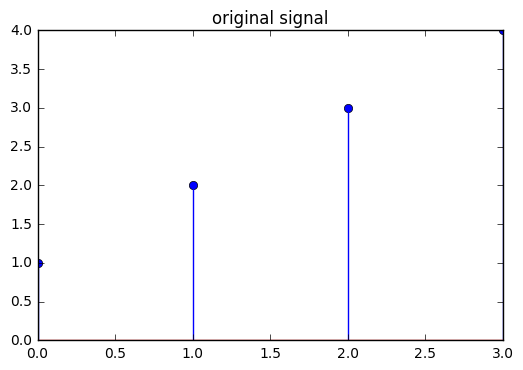

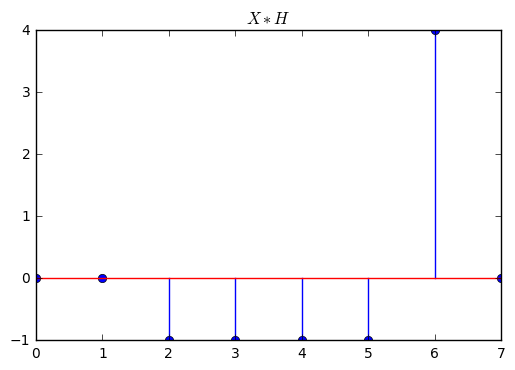

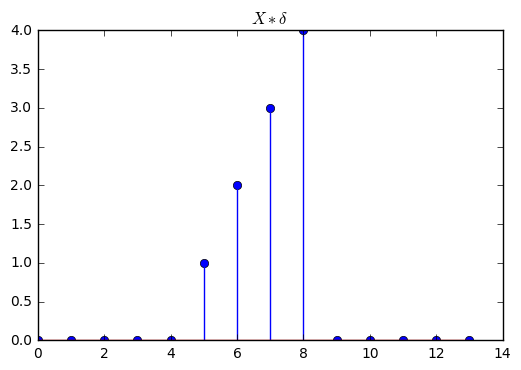

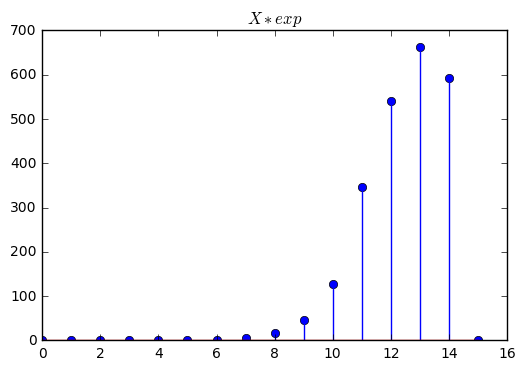

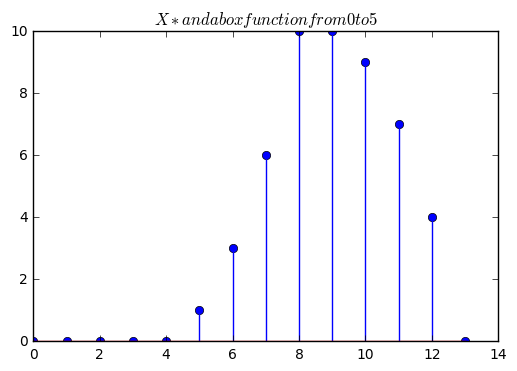

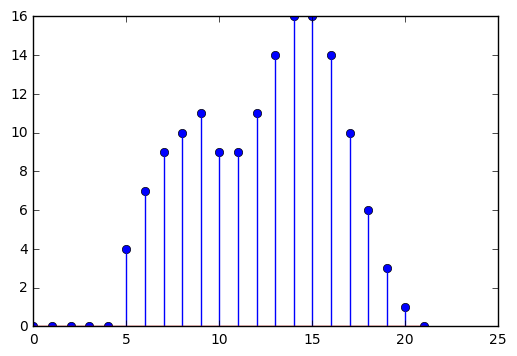

In [94]:
x = np.array([1, 2, 3, 4])
h = np.array([-1,1])



plt.stem(x)
plt.title('original signal')

#1 convoultion off the signal and a given signal h



f1=conv_fn(x,h)
plt.figure()
plt.stem(f1) 
plt.title('$ X * H $')


#2 convulotion by the signal and the impulse dirac
h2 = dirac(0,5)


f2 = conv_fn(x,h2)


plt.figure()
plt.stem(f2)
plt.title('$ X * \delta $')


#3convolution off the signal and the exponantial function
h3 = np.zeros(6)
for i in range(0,h3.size):
    h3[i] = math.exp(i)
    
f3 = conv_fn(x,h3)

plt.figure()
plt.stem(f3)
plt.title('$ X * exp $')

#4convolution from signal and step signal
h4 = H_FUNC(0,5)


f4 = conv_fn(x,h4)

plt.figure()
plt.stem(f4)
plt.title('$ X * and a box function from 0 to 5 $')

#5  Consider the previous input signal, we wrote the symmetric version and we did the convoultion
x2 = np.array([4,3,2,1,1, 2, 3, 4,4,3,2,1])
h5 = H_FUNC(0,5)


f5 = conv_fn(x2,h5)

plt.figure()
plt.stem(f5)

## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [100]:

def convin2d(inn,m,n,K,coeffs):   
    out = np.zeros(shape=(512,512))
   
    for i in range(K/2, m - K/2):# we iterate through the image and we start from the center
        for j in range(K/2 , n - K/2):
            summ = 0; # sum will be the sum of input data * coeff terms
            
            for ii in range(-K/2, K/2): # iterate over kernel
                for jj in range( -K/2, K/2):
                    data = inn[i + ii][j +jj];
                    coeff = coeffs[ii + K/2][jj + K/2];

                    summ += data * coeff;
          
            out[i][j] = summ; # scale sum of convolution products and store in output
    return out


    

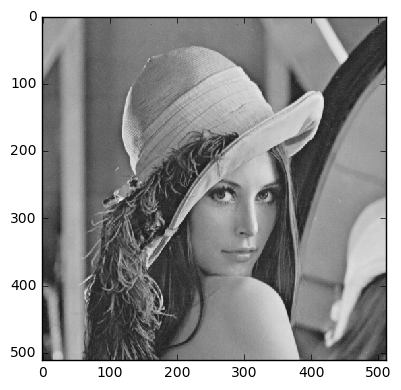

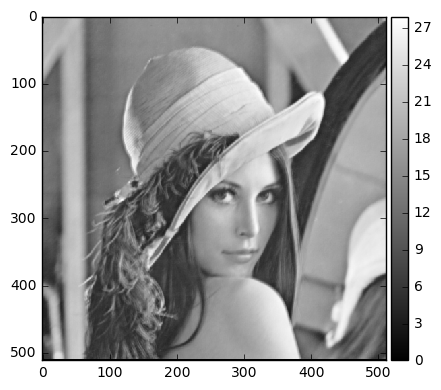

In [101]:
kernel = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4,1]])

for i in range(1,5):
    for j in range(1,5):
        kernel[i][j] = kernel[i][j]*1/256;

img = io.imread("../images/lena-grey.bmp");

img_f = img_as_float(img);
res = convin2d(img_f, 512,512, 5,kernel);
io.imshow(img)
plt.figure()
io.imshow(res,cmap=cm.gray)

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

ValueError: too many values to unpack

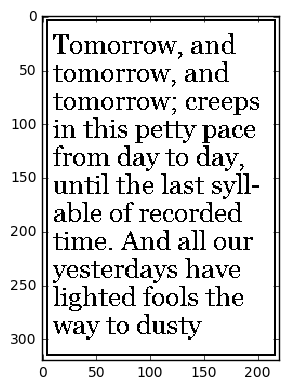

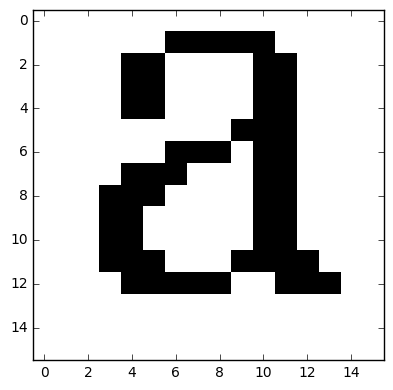

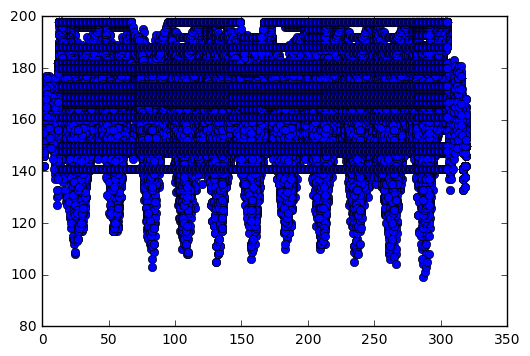

In [105]:
from skimage import filter as filters
from skimage import exposure
from scipy import signal
from scipy import misc

a_ref = io.imread("../images/a.png",as_grey = True);
text = io.imread("../images/text.png",as_grey = True);

text_binarized_th = filters.threshold_otsu(text);
text_b = text > text_binarized_th;
text_b = img_as_float(text_b);

a_binarized_th = filters.threshold_otsu(a_ref);
a_b = a_ref > a_binarized_th;
a_b = img_as_float(a_b);

io.imshow(text_b);
plt.figure();
io.imshow(a_b);





corr = signal.correlate2d(text_b, a_b, boundary='symm', mode='same')
plt.figure()
plt.stem(corr)
#print corr

In [21]:
#the peaks show where the correlation is hig between the two given image,
#so in this way we can understand that each peak corrsponds one letter a because the first image is one "a"